# 데이터 분석 단계 초기화

In [17]:
root_path = '/content/drive/MyDrive/프로그래머스 데브코스 데이터 분석/최종 프로젝트/airbnb-recruiting-new-user-bookings'

In [18]:
import pandas as pd
from matplotlib import pyplot as plt

In [19]:
# df_bkts = pd.read_csv(root_path+'/age_gender_bkts.csv')
# df_countries = pd.read_csv(root_path+'/countries.csv')
# df_submission = pd.read_csv(root_path+'/sample_submission_NDF.csv')
df_sessions = pd.read_csv(root_path+'/sessions.csv')
# df_test = pd.read_csv(root_path+'/test_users.csv')
df_train = pd.read_csv(root_path+'/train_users_2.csv')

# 사용자 데이터 분석

In [ ]:
df_train.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# 사용자 행동 데이터 분석

In [ ]:
df_temp_1 = df_train[['date_account_created','timestamp_first_active','date_first_booking']]
df_temp_1

,date_account_created,timestamp_first_active,date_first_booking
0,2010-06-28,20090319043255,NaN
1,2011-05-25,20090523174809,NaN
2,2010-09-28,20090609231247,2010-08-02
3,2011-12-05,20091031060129,2012-09-08
4,2010-09-14,20091208061105,2010-02-18
...,...,...,...
213446,2014-06-30,20140630235636,NaN
213447,2014-06-30,20140630235719,NaN
213448,2014-06-30,20140630235754,NaN
213449,2014-06-30,20140630235822,NaN


In [ ]:
df_temp_1['timestamp_first_active_new'] = df_temp_1['timestamp_first_active'].astype(str).str[0:4] + '-' + df_temp_1['timestamp_first_active'].astype(str).str[4:6] + '-' + df_temp_1['timestamp_first_active'].astype(str).str[6:8]
df_temp_1.drop('timestamp_first_active',inplace=True,axis=1)

<ipython-input-5-83e633c9a879>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_1['timestamp_first_active_new'] = df_temp_1['timestamp_first_active'].astype(str).str[0:4] + '-' + df_temp_1['timestamp_first_active'].astype(str).str[4:6] + '-' + df_temp_1['timestamp_first_active'].astype(str).str[6:8]
<ipython-input-5-83e633c9a879>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_1.drop('timestamp_first_active',inplace=True,axis=1)


In [ ]:
df_temp_1

,date_account_created,date_first_booking,timestamp_first_active_new
0,2010-06-28,NaN,2009-03-19
1,2011-05-25,NaN,2009-05-23
2,2010-09-28,2010-08-02,2009-06-09
3,2011-12-05,2012-09-08,2009-10-31
4,2010-09-14,2010-02-18,2009-12-08
...,...,...,...
213446,2014-06-30,NaN,2014-06-30
213447,2014-06-30,NaN,2014-06-30
213448,2014-06-30,NaN,2014-06-30
213449,2014-06-30,NaN,2014-06-30


Text(0, 0.5, 'Number of Accounts Created')

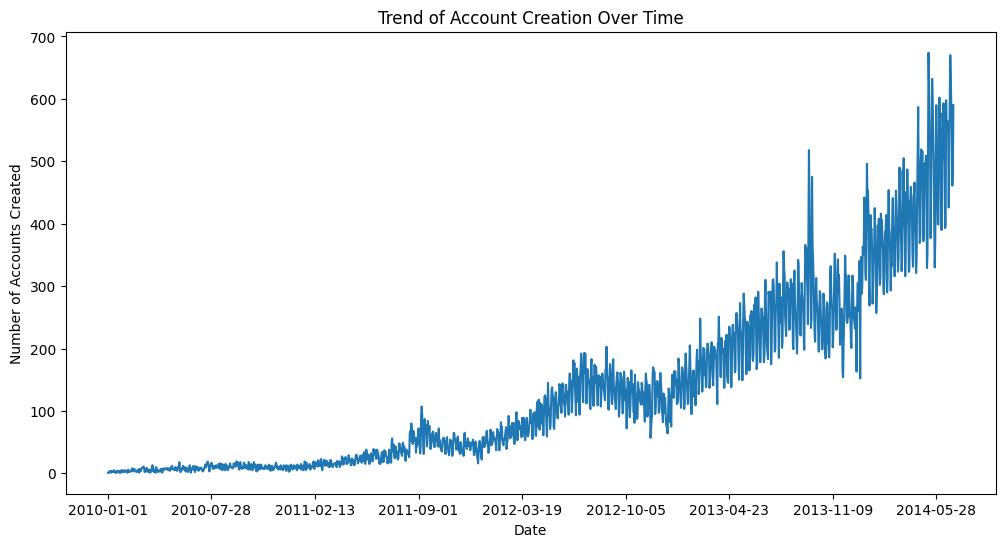

In [ ]:
plt.figure(figsize=(12, 6))
df_temp_1['date_account_created'].value_counts().sort_index().plot()
plt.title('Trend of Account Creation Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accounts Created')

In [ ]:
df_temp_1['isbook'] = ~df_temp_1['date_first_booking'].isna()

<ipython-input-8-44420754b698>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_1['isbook'] = ~df_temp_1['date_first_booking'].isna()


In [ ]:
df_temp_1

,date_account_created,date_first_booking,timestamp_first_active_new,isbook
0,2010-06-28,NaN,2009-03-19,False
1,2011-05-25,NaN,2009-05-23,False
2,2010-09-28,2010-08-02,2009-06-09,True
3,2011-12-05,2012-09-08,2009-10-31,True
4,2010-09-14,2010-02-18,2009-12-08,True
...,...,...,...,...
213446,2014-06-30,NaN,2014-06-30,False
213447,2014-06-30,NaN,2014-06-30,False
213448,2014-06-30,NaN,2014-06-30,False
213449,2014-06-30,NaN,2014-06-30,False


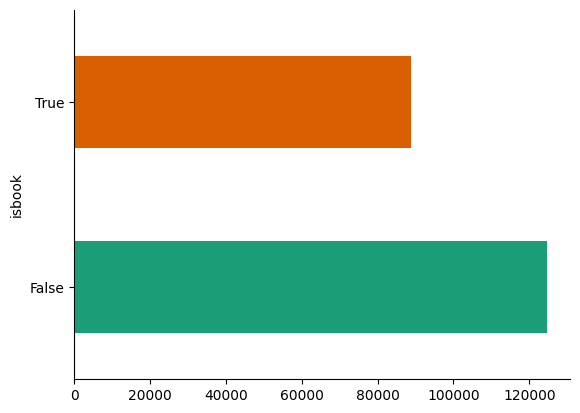

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_temp_1.groupby('isbook').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_temp_booked = df_train[~df_train['date_first_booking'].isna()]
df_temp_nobooked = df_train[df_train['date_first_booking'].isna()]

In [ ]:
df_temp_booked

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,20140630230136,2014-06-30,-unknown-,55.0,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,FR
213439,msucfwmlzc,2014-06-30,20140630234729,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


<ipython-input-13-5d2da8b82f91>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_temp_booked, y=y_label, ax=axes[0], palette='Dark2')
<ipython-input-13-5d2da8b82f91>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_temp_nobooked, y=y_label, ax=axes[1], palette='Dark2')


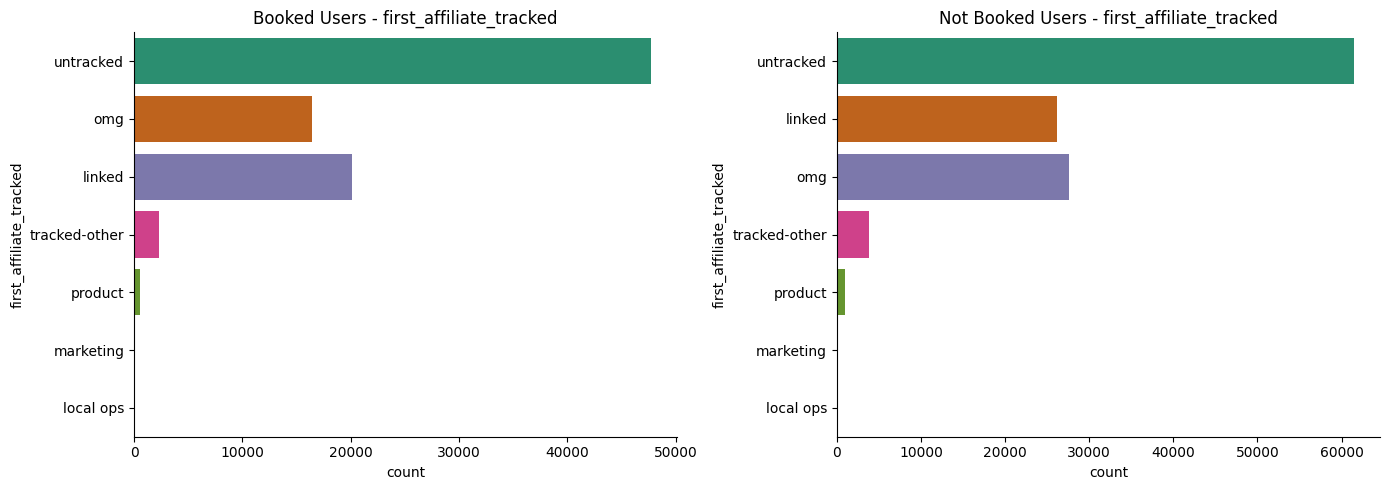

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_label = 'first_affiliate_tracked'

# Set up the matplotlib figure for two plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Adjust subplot layout to 1 row and 2 columns

# Plot for 'booked users' by 'first_affiliate_tracked'
sns.countplot(data=df_temp_booked, y=y_label, ax=axes[0], palette='Dark2')
axes[0].set_title('Booked Users - '+y_label)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Plot for 'not booked users' by 'first_affiliate_tracked'
sns.countplot(data=df_temp_nobooked, y=y_label, ax=axes[1], palette='Dark2')
axes[1].set_title('Not Booked Users - '+y_label)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
df_temp_nobooked

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
11,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF
13,dy3rgx56cu,2010-01-05,20100105083259,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF
14,ju3h98ch3w,2010-01-07,20100107055820,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [ ]:
df_temp_booked

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,20140630230136,2014-06-30,-unknown-,55.0,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,FR
213439,msucfwmlzc,2014-06-30,20140630234729,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


In [ ]:
df_temp_booked_merge = pd.merge(df_temp_booked, df_sessions, left_on='id', right_on='user_id', how='inner', suffixes=('_left', '_right'))
df_temp_nobooked_merge = pd.merge(df_temp_nobooked, df_sessions, left_on='id', right_on='user_id', how='inner', suffixes=('_left', '_right'))

In [ ]:
df_temp_booked_merge['secs_elapsed_new'] = df_temp_booked_merge['secs_elapsed']//1000
df_temp_nobooked_merge['secs_elapsed_new'] = df_temp_nobooked_merge['secs_elapsed']//1000

In [ ]:
df_temp_booked_merge['secs_elapsed_new'].min()

0.0

<ipython-input-24-29953792e733>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_temp_booked_merge, y=y_label, ax=axes[0], palette='Dark2')
<ipython-input-24-29953792e733>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_temp_nobooked_merge, y=y_label, ax=axes[1], palette='Dark2')


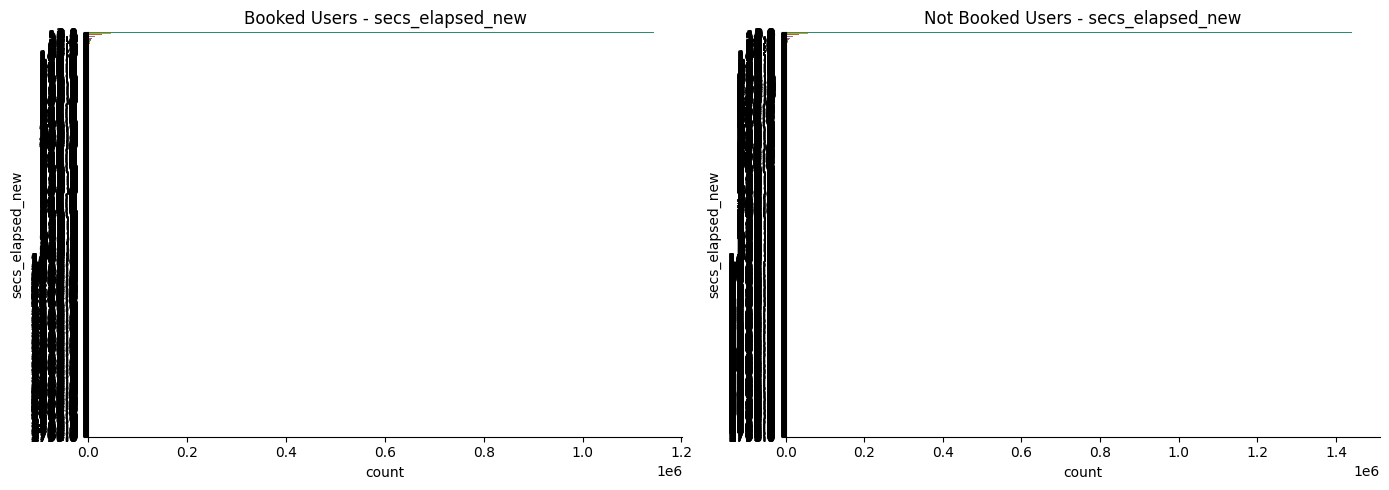

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_label = 'secs_elapsed_new'

# Set up the matplotlib figure for two plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Adjust subplot layout to 1 row and 2 columns

# Plot for 'booked users' by 'first_affiliate_tracked'
sns.countplot(data=df_temp_booked_merge, y=y_label, ax=axes[0], palette='Dark2')
axes[0].set_title('Booked Users - '+y_label)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Plot for 'not booked users' by 'first_affiliate_tracked'
sns.countplot(data=df_temp_nobooked_merge, y=y_label, ax=axes[1], palette='Dark2')
axes[1].set_title('Not Booked Users - '+y_label)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


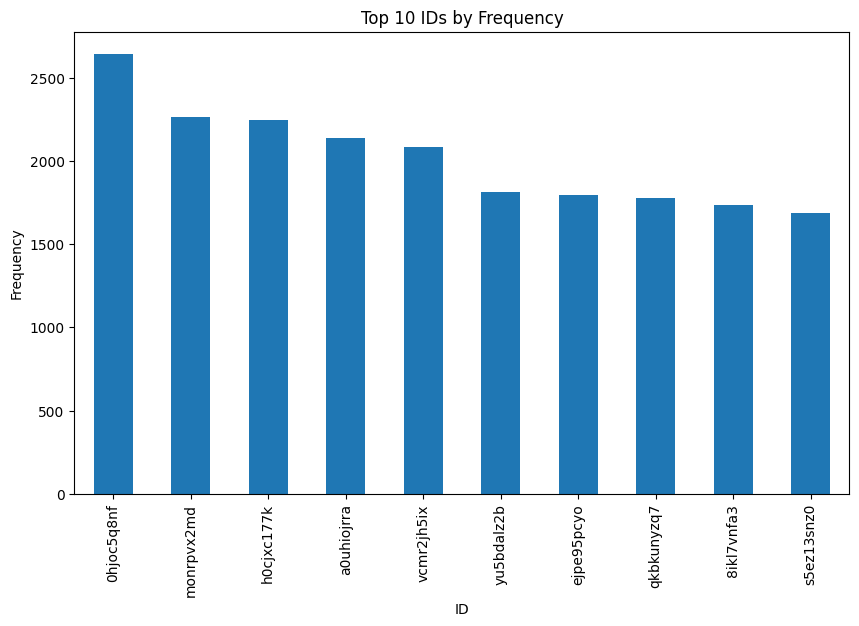

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# 'id'로 groupby 실행 후 각 id별 횟수 계산
id_counts = df_temp_booked_merge.groupby('id').size()

# 횟수가 많은 순으로 정렬하고 상위 10개 선택
top_10_ids = id_counts.sort_values(ascending=False).head(10)

# 그래프로 표시
plt.figure(figsize=(10, 6))
top_10_ids.plot(kind='bar')
plt.title('Top 10 IDs by Frequency')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.show()

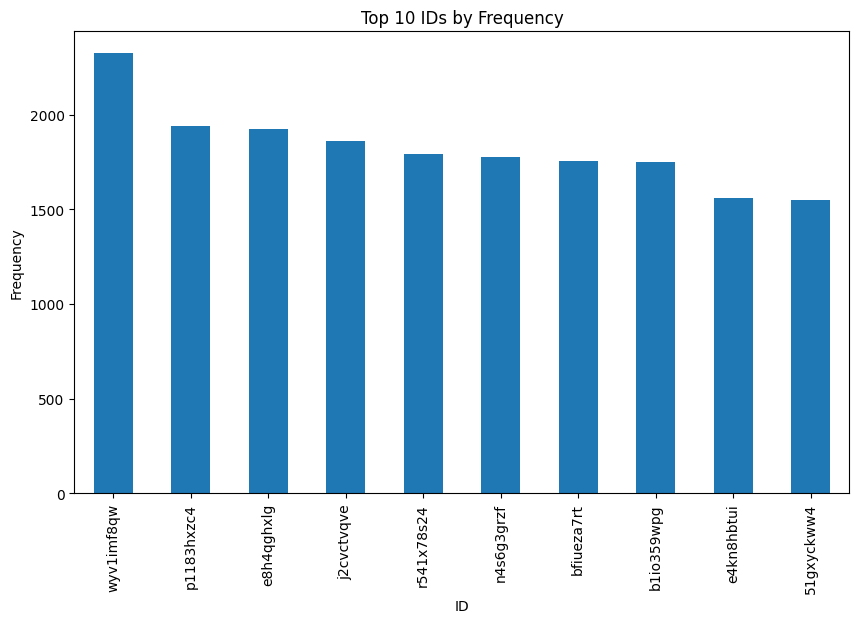

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# 'id'로 groupby 실행 후 각 id별 횟수 계산
id_counts = df_temp_nobooked_merge.groupby('id').size()

# 횟수가 많은 순으로 정렬하고 상위 10개 선택
top_10_ids = id_counts.sort_values(ascending=False).head(10)

# 그래프로 표시
plt.figure(figsize=(10, 6))
top_10_ids.plot(kind='bar')
plt.title('Top 10 IDs by Frequency')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# df_merge = pd.merge(df1, df2, on='key', how='left', suffixes=('_left', '_right'))

# 새 섹션

In [20]:
# df_train['date_first_booking_month'] = df_train['date_first_booking'].str[5:7]
df_booked = df_train[~df_train['date_first_booking'].isna()]
df_booked['date_first_booking_month'] = df_booked['date_first_booking'].str[5:7].astype(int)
df_nobooked = df_train[df_train['date_first_booking'].isna()]

<ipython-input-20-a0b260a99fc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booked['date_first_booking_month'] = df_booked['date_first_booking'].str[5:7].astype(int)


In [21]:
df_booked.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_booking_month
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,8
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,9
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,1
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,1


In [22]:
df_booked[['date_first_booking_month']]

,date_first_booking_month
2,8
3,9
4,2
5,1
6,1
...,...
213415,6
213439,3
213441,8
213443,7


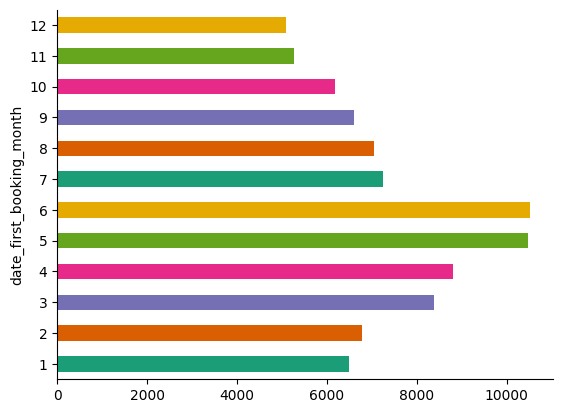

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
df_booked.groupby('date_first_booking_month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)